In [ ]:
%%capture
!git clone https://github.com/egusg/comp432.git
%cd benchmarks
!git submodule update --init --recursive
%cd /content/comp432/benchmarks/MOABB
!pip install -r speechrequirements.txt
!pip install -e .
!pip install -r ../../requirements.txt    # Install base dependencies
!pip install -r extra-requirements.txt    # Install additional dependencies
%cd /content/comp432/benchmarks/MOABB
%env PYTHON_PATH=/content/benchmarks/

%cd /content/comp432/benchmarks/MOABB/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade mne mne-bids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: mne-bids
    Found existing installation: mne-bids 0.13
    Uninstalling mne-bids-0.13:
      Successfully uninstalled mne-bids-0.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moabb 1.0.0 requires mne-bids<0.14,>=0.13, but you have mne-bids 0.14 which is incompatible.


In [13]:
!./run_experiments.sh --hparams /content/comp432/benchmarks/MOABB/hparams/MotorImagery/BNCI2014001/EEGNetE2.yaml \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/full/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--number_of_epochs 1000 \
--device 'cuda'

hparams: /content/comp432/benchmarks/MOABB/hparams/MotorImagery/BNCI2014001/EEGNetE2.yaml
data_folder: /content/data/BNCI2014001
cached_data_folder: /content/data
output_folder: /content/results/full/BNCI2014001
nsbj: 9
nsess: 2
seed: 16493
nruns: 1
eval_metric: acc
eval_set: test
train_mode: leave-one-session-out
rnd_dir: False
additional flags: --number_of_epochs 1000 --device cuda 
Subject 0
2024-04-26 00:17:02.650477: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 00:17:02.703159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 00:17:02.703214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable

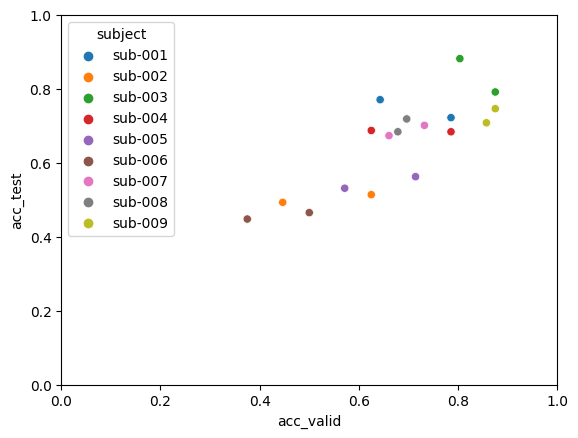

In [18]:
# %% [code]
import pathlib as pl
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = []
for path in pl.Path('/content/drive/My Drive/hyper-results/hyperparameter-search').glob('**/*_metrics.pkl'):
    with open(path, 'rb') as f:
        metrics = pkl.load(f)
    parts = path.parts
    set_ = parts[-1].split('_')[0]
    session = parts[-2]
    subject = parts[-3]
    trial = parts[-7]
    seed = parts[-5]
    run = parts[-6]
    metrics.update(session=session, subject=subject, trial=trial, seed=seed, run=run, set=set_)
    data.append(metrics)

# Create DataFrame
data = pd.DataFrame(data)
data = data.set_index(['trial', 'session', 'subject', 'set'])
valid = data.xs('valid', level='set')
test = data.xs('test', level='set')
data = valid.join(test, lsuffix='_valid', rsuffix='_test')

# Plot
sns.scatterplot(data=data, x='acc_valid', y='acc_test', hue='subject')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.show()

In [2]:
import shutil
import os

# Path of the folder in Colab
source_folder = '/content/results'  # Change 'your_colab_folder' to your folder's name

# Destination path in Google Drive
destination_folder = '/content/drive/My Drive/hyper-results/full-experiment100'  # Change 'destination_folder' to your desired path in Drive

# Make sure the destination directory exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copy the folder to Google Drive
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)  # dirs_exist_ok=True allows overwriting if the folder already exists


FileNotFoundError: [Errno 2] No such file or directory: '/content/results'

In [ ]:
%cd '/content/comp432/benchmarks/MOABB/'

!./run_hparam_optimization.sh --hparams 'hparams/MotorImagery/BNCI2014001/EEGNetE1.yaml' \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/hyperparameter-search/BNCI2014001' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'hyperparameter-search' \
--nsbj_hpsearch 3 --nsess_hpsearch 2 \
--nruns_eval 1 \
--eval_metric acc \
--exp_max_trials 4 \

Streaming output truncated to the last 5000 lines.
│    │    └─Conv2d: 3-3                  [1, 36, 474, 1]           612
│    └─BatchNorm2d: 2-4                  [1, 474, 1, 36]           --
│    │    └─BatchNorm2d: 3-4             [1, 36, 1, 474]           72
│    └─ELU: 2-5                          [1, 474, 1, 36]           --
│    └─Pooling2d: 2-6                    [1, 118, 1, 36]           --
│    │    └─AvgPool2d: 3-5               [1, 36, 118, 1]           --
│    └─Dropout: 2-7                      [1, 118, 1, 36]           --
│    └─Conv2d: 2-8                       [1, 118, 1, 16]           --
│    │    └─Conv2d: 3-6                  [1, 16, 118, 1]           1,728
│    └─BatchNorm2d: 2-9                  [1, 118, 1, 16]           --
│    │    └─BatchNorm2d: 3-7             [1, 16, 1, 118]           32
│    └─ReLU: 2-10                        [1, 118, 1, 16]           --
│    └─Conv2d: 2-11                      [1, 117, 1, 576]          --
│    │    └─Conv2d: 3-8            

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)


Current Working Directory: /content/comp432/benchmarks/MOABB


In [17]:
import pandas as pd

# Define the data as a dictionary
data = {
    'Parameter': [
        'Input Shape', 'Temporal Kernels', 'Temporal Kernel Size',
        'Spatial Depth Multiplier', 'Spatial Max Norm', 'Spatial Pool Size',
        'SepTemporal Depth Multiplier', 'SepTemporal Point Kernels Ratio',
        'Number of SepTemporal Point Kernels', 'SepTemporal Kernel Size', 'SepTemporal Pool Size',
        'Pooling Type', 'Dense Max Norm', 'Dropout Rate', 'Activation Type',
        'New Output Channels', 'New Kernel Size'
    ],
    'Value': [
        '[null, T, C, null]', '61', '51',
        '4', '1.0', '4',
        '1', 'Ratio = 7/4',
        'Dynamically Calculated', 'Dynamically Calculated (rounding applied)', '7',
        'avg', '0.25', '0.008464', 'ELU',
        '16', '[3, 1]'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame with a title
print("Table 2: EEGNet with Residual Block Hyperparameters")
df



Table 2: EEGNet with Residual Block Hyperparameters


,Parameter,Value
0,Input Shape,"[null, T, C, null]"
1,Temporal Kernels,61
2,Temporal Kernel Size,51
3,Spatial Depth Multiplier,4
4,Spatial Max Norm,1.0
5,Spatial Pool Size,4
6,SepTemporal Depth Multiplier,1
7,SepTemporal Point Kernels Ratio,Ratio = 7/4
8,Number of SepTemporal Point Kernels,Dynamically Calculated
9,SepTemporal Kernel Size,Dynamically Calculated (rounding applied)


In [21]:
import pandas as pd

# Define the data for the table with three experiments
data = {
    'Release': ['23-10-02', '24-04-15', '23-04-15'],
    'Task': ['Motor imagery', 'Motor imagery', 'Motor imagery'],
    'Hyperparams file': [
        '/MotorImagery/BNCI2014001/EEGNet.yaml',
        '/MotorImagery/BNCI2014001/EEGNetE1.yaml',
        '/MotorImagery/BNCI2014001/EEGNetE2.yaml'
    ],
    'Training strategy': ['leave-one-session-out', 'leave-one-session-out', 'leave-one-session-out'],
    'Key loaded model': ['acc', 'acc', 'acc'],
    'Performance (test set)': ['0.731559±0.003888', '0.614680 ± 0.007303', '0.603926 ± 0.009764 '],
    'Number of runs (nruns)': ['10', '4', '4'],
    'Number of epochs': ['862', '100', '100'],
    'GPUs': ['1xNVIDIA V100 (16 GB)', '1xNVIDIA V100 (16 GB)', '1xNVIDIA V100 (16 GB)']
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Release,Task,Hyperparams file,Training strategy,Key loaded model,Performance (test set),Number of runs (nruns),Number of epochs,GPUs
0,23-10-02,Motor imagery,/MotorImagery/BNCI2014001/EEGNet.yaml,leave-one-session-out,acc,0.731559±0.003888,10,862,1xNVIDIA V100 (16 GB)
1,24-04-15,Motor imagery,/MotorImagery/BNCI2014001/EEGNetE1.yaml,leave-one-session-out,acc,0.614680 ± 0.007303,4,100,1xNVIDIA V100 (16 GB)
2,23-04-15,Motor imagery,/MotorImagery/BNCI2014001/EEGNetE2.yaml,leave-one-session-out,acc,0.603926 ± 0.009764,4,100,1xNVIDIA V100 (16 GB)
